In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output  # Just for showing Output.
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [2]:
# Load dataset.

#training data
dftrain = pd.read_csv(
    'https://storage.googleapis.com/tf-datasets/titanic/train.csv')

# Testing data
dfeval = pd.read_csv(
    'https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
print(dftrain.head())
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [7]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses',
                       'parch', 'class', 'deck', 'embark_town', 'alone']

NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    #     gets a list of all unique values from given feature column
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(
        feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(
        feature_name, dtype=tf.float32))

s = pd.DataFrame(feature_columns)
print(feature_columns)
print(s)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [8]:
def make_input_fn(data_df , label_df , num_epochs=10, shuffle=True , batch_size=32):
    def input_function(): #inner function, this will be returned
        # Create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle :
            ds = ds.shuffle(1000) #random order of data
        ds = ds.batch(batch_size).repeat(num_epochs)#split dataset into batches of 32 and repeat process for number of epochs
        return ds # return a batch of dataset
    return input_function # return a function object for use

# here we will call the input function that was return to us to get a data
train_input_fn = make_input_fn(dftrain , y_train) 
eval_input_fn = make_input_fn(dfeval , y_eval , num_epochs=1 , shuffle=False)

In [9]:
# Creating Model
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# we create a linear estimator by passing the feature columns we created earlier.

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\india\\AppData\\Local\\Temp\\tmp93g4b4_5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
# Training and Testing Model
linear_est.train(train_input_fn) #train
result = linear_est.evaluate(eval_input_fn) # get model metrics/stats by testing on testing data

clear_output() # it clears the console output
print(result['accuracy']) # the result varaible is simply a dict of stats about our model
print(result)

0.78409094
{'accuracy': 0.78409094, 'accuracy_baseline': 0.625, 'auc': 0.83559847, 'auc_precision_recall': 0.7800277, 'average_loss': 0.4686265, 'label/mean': 0.375, 'loss': 0.45098507, 'precision': 0.71, 'prediction/mean': 0.3860807, 'recall': 0.7171717, 'global_step': 5800}


In [58]:
# Final result
#predicting from model/result 
result = list(linear_est.predict(eval_input_fn))
print(dfeval.loc[0])
print(y_eval.loc[0])
print("Chance of Survival : ",result[0]['probabilities'][1])
print("Chance of not Survival : ",result[0]['probabilities'][0])



INFO:tensorflow:Calling model_fn.


c:\users\india\appdata\local\programs\python\python38\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\india\AppData\Local\Temp\tmp93g4b4_5\model.ckpt-5800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
0
Chance of Survival :  0.0653768
Chance of not Survival :  0.93462324


In [57]:
result[1]

{'logits': array([-0.11922299], dtype=float32),
 'logistic': array([0.4702295], dtype=float32),
 'probabilities': array([0.5297705, 0.4702295], dtype=float32),
 'class_ids': array([0], dtype=int64),
 'classes': array([b'0'], dtype=object),
 'all_class_ids': array([0, 1]),
 'all_classes': array([b'0', b'1'], dtype=object)}

In [37]:
r = pd.DataFrame(result)
r

,logits,logistic,probabilities,class_ids,classes,all_class_ids,all_classes
0,[-2.659976],[0.06537676],"[0.93462324, 0.0653768]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
1,[-0.11922299],[0.4702295],"[0.5297705, 0.4702295]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
2,[0.9416019],[0.7194231],"[0.28057688, 0.7194231]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
3,[0.30427468],[0.57548714],"[0.4245128, 0.57548714]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
4,[-1.2752137],[0.21836609],"[0.7816339, 0.21836606]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
...,...,...,...,...,...,...,...
259,[1.451186],[0.8101809],"[0.18981913, 0.8101809]",[1],[b'1'],"[0, 1]","[b'0', b'1']"
260,[-2.5855446],[0.07007453],"[0.92992544, 0.07007456]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
261,[-0.9840565],[0.27208766],"[0.72791237, 0.27208763]",[0],[b'0'],"[0, 1]","[b'0', b'1']"
262,[-1.637038],[0.16286853],"[0.83713144, 0.1628685]",[0],[b'0'],"[0, 1]","[b'0', b'1']"


In [64]:
p = r.loc[:]['probabilities']
survived = []
not_survived = []
for i,j in p :
    not_survived.append(i)
    survived.append(j)
data = {
    "survived" : survived,
    "not_survived" : not_survived
}
data = pd.DataFrame(data)
data

,survived,not_survived
0,0.065377,0.934623
1,0.470230,0.529770
2,0.719423,0.280577
3,0.575487,0.424513
4,0.218366,0.781634
...,...,...
259,0.810181,0.189819
260,0.070075,0.929925
261,0.272088,0.727912
262,0.162868,0.837131


<AxesSubplot:>

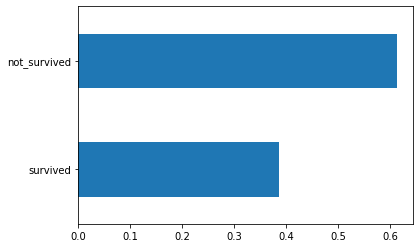

In [66]:
data.mean().plot(kind="barh")